In [1]:
import pandas as pd
import numpy as np
import re
posts = pd.read_csv('posts_clean.csv.gz', compression='gzip', error_bad_lines=False)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Contagens

In [2]:
blogs = posts[['posts.csv']].groupby(['posts.csv'])
autores = posts[['authorID']].groupby(['authorID'])
print('Postagens: %i' %len(posts))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Postagens: 1346858
Blogs: 144045
Autores: 154787


## Ano de Publicação

In [3]:
posts['date'] = pd.to_datetime(posts['published'], errors='coerce')
posts['year'] = posts['date'].dt.year

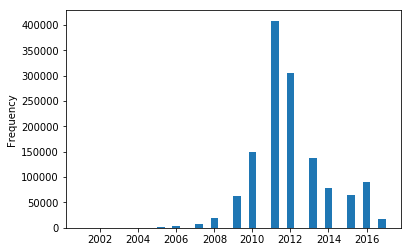

In [4]:
%matplotlib inline
year = posts['year']
year = year[year > 2000]
year = year[year < 2018]
year.plot.hist(bins=40)

In [23]:
posts[['posts.csv','year']].groupby(['year']).agg(['count'])

,posts.csv
,count
year,
1999.0,2
2000.0,4
2001.0,17
2002.0,6
2003.0,27
2004.0,20
2005.0,1725
2006.0,3695


## Médias

In [5]:
def titleCount(x): 
    try:
        return len(re.findall(r'\w+', x['title']))
    except:
        return 0
    
def contentCount(x): 
    try:
        return len(re.findall(r'\w+', x['content']))
    except:
        return 0

def wpsCount(x): 
    try:
        return x['contentCount'] / x['content'].count(".")
    except:
        return x['contentCount']
    
posts['titleCount'] = posts.apply(titleCount,axis=1)
posts['contentCount'] = posts.apply(contentCount,axis=1)
posts['wpsCount'] = posts.apply(wpsCount,axis=1)

In [23]:
#posts.to_csv('posts_count.csv.gz', compression='gzip')

In [6]:
np.mean(posts['titleCount'])

4.3452457497375372

In [7]:
np.mean(posts['contentCount'])

245.77212965286614

In [18]:
np.mean(posts['wpsCount'])

20.941070399005731

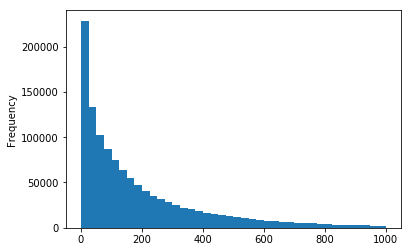

In [8]:
%matplotlib inline
contentCount = posts['contentCount']
contentCount = contentCount[contentCount > 1]
contentCount = contentCount[contentCount < 1000]
contentCount.plot.hist(bins=40)

## Blogs mais densos

In [9]:
blogLen = posts[['posts.csv','contentCount']].groupby(['posts.csv']).agg(['count','mean'])
blogLen['contentCount'].sort_values('mean',ascending=False).head(10)

,count,mean
posts.csv,,
1.717984e+18,10,59727.3
2.329723e+17,10,37914.3
1.881441e+18,10,28846.8
2.294214e+18,10,24485.5
1.174338e+18,10,21617.5
1.156788e+18,9,21231.0
1.636456e+18,4,19915.5
1.024539e+18,10,18299.4
2.083401e+18,10,18166.6


## Posts mais comentados

In [10]:
posts[['title','replies']].sort_values('replies',ascending=False).head(10)

,title,replies
890168,Aprenda a usar o novo orkut!,1938.0
977144,TUDO SOBRE LÉO SANTANA,1232.0
890170,Miedi que eu respondo!,1135.0
890167,"Ely Kim, o melhor dançarino do mundo",1129.0
890174,O fim do Concurso Cultural,1108.0
229670,Urgente! Publicado o Edital do Concurso da PME...,1102.0
683605,Deixe seu Recado no meu Guestbook,695.0
577225,Sorteio,553.0
1248769,Need for Speed: The Run (ISO) [MediaFire] + Cr...,531.0
162174,FÓRUM 3 ANO 3 BIMESTRE 2015,528.0


## Posts Auto-Reflexivos

In [19]:
posts = posts.fillna('')
postsReflexivos = posts[posts['content'].str.contains("eu sinto|eu penso|eu acredito")]

print('Posts Reflexivos: %i' %len(postsReflexivos))
print('Total de Posts: %i' %len(posts))
print('Percentual: %f' %round(100 * len(postsReflexivos) / len(posts),3))

Posts Reflexivos: 13881
Total de Posts: 1346858
Percentual: 1.031000


## Blogs Auto-Reflexivos

In [12]:
postsReflexivos['blogID'] = postsReflexivos['posts.csv'].astype(int).astype('str')
groupReflex = postsReflexivos[['blogID','contentCount']].groupby(['blogID']).agg(['count','mean'])
groupReflex['contentCount'].sort_values('count',ascending=False).head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,count,mean
blogID,,
1717983962433433088,8,74107.625000
242410630245328480,8,309.375000
2299697280975917568,7,247.000000
118502485184438272,7,530.428571
1978371034383716864,7,2115.142857
2376002203817739776,7,190.857143
1661881252606013696,6,1560.666667
1903048977906924288,6,439.666667
2134748788525575936,6,4668.333333


In [13]:
postsReflexivos[['title','replies']].sort_values('replies',ascending=False).head(10)

,title,replies
1089511,Hormonios Femininos - Travestis e Transxeuais,187
1285737,19 de Março a 07 de Abril de 2011,177
1333666,Dangerous Life 3° - Capítulo 6 - Confusion,166
55916,Invasão para amiga,95
441487,Às pessoas mais importantes da minha vida.,84
1061746,,78
530873,fifty ♡,78
1333661,The Apprentice - Fourteenth chapter,78
258971,thirty-first chapter,71
614678,Sapatos e Homens,63


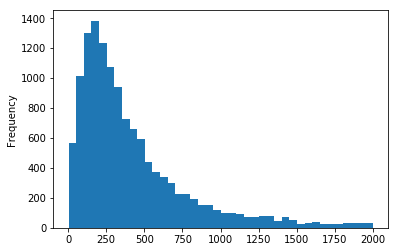

In [14]:
%matplotlib inline
contentCount = postsReflexivos['contentCount']
contentCount = contentCount[contentCount > 1]
contentCount = contentCount[contentCount < 2000]
contentCount.plot.hist(bins=40)

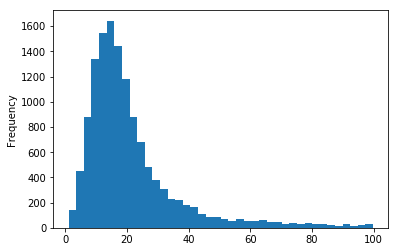

In [22]:
%matplotlib inline
wpsCount = postsReflexivos['wpsCount']
wpsCount = wpsCount[wpsCount > 1]
wpsCount = wpsCount[wpsCount < 100]
wpsCount.plot.hist(bins=40)